### 결측치와 이상치 처리 방법
- 제거 : 결측치나 이상치를 가진 데이터를 제거한다.
- 제거를 하게 되면 데이터의 왜곡이 발생하지는 않지만 데이터 양이 줄어든다.
- 대체 : 결측치나 이상치를 다른 값으로 바꾸는 것을 의미한다.
- 대체를 하게 되면 데이터의 양이 줄어들지는 않지만 왜곡이 발생한다.
- 제거가 우선이다.

- 여기에서 matplotlib 를 사용할 것이다.
- 그래프를 그리는 라이브러리이다.
- 극단치 존재 여부를 확인하는 작업을 할 것이기 때문에 여기에서 미리 사용해본다.
- pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 결측치 확인

In [2]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [3]:
# 각 컬럼별 결측의 개수를 확인한다.
a1 = df1.isna().sum()
a1[a1 > 0]

영어    1
수학    2
과학    1
dtype: int64

### 결측치 제거

In [4]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [5]:
# 결측치가 포함된 모든 행을 제거한다.
df2 = df1.copy()

df2.dropna(inplace=True)

display(df1)
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [6]:
# 컬럼을 지정하여 그 컬럼들에 결측치가 있는 행들을 제거한다.
df2 = df1.copy()

df2.dropna(inplace=True, subset=['수학', '과학'])

display(df1)
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [7]:
# 모든 컬럼에 결측치가 있는 행을 삭제한다.
# 그냥 한번 돌려주세요~
df2 = df1.copy()

df2.loc['길동'] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
display(df2)

df2.dropna(inplace=True, how='all')
df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,NaN,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,NaN,NaN
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,NaN,88.0
길동,NaN,NaN,NaN,NaN,NaN,NaN


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,NaN,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,NaN,NaN
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,NaN,88.0


In [8]:
# 결측치가 있는 모든 컬럼을 삭제한다.
df2 = df1.copy()

df2.dropna(inplace=True, axis=1)

display(df1)
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어
이름,,,
철수,1,남자,98
영희,2,여자,88
민수,1,남자,92
수현,3,여자,63
호영,4,남자,120


In [9]:
# index를 지정하여 결측치가 있는 컬럼을 삭제한다.
df2 = df1.copy()

df2.dropna(inplace=True, axis=1, subset=['민수', '호영'])

display(df1)
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어
이름,,,,
철수,1,남자,98,NaN
영희,2,여자,88,90.0
민수,1,남자,92,70.0
수현,3,여자,63,60.0
호영,4,남자,120,50.0


### 결측치 대체

In [10]:
# 모든 결측치에 동일한 값을 채워준다.
df2 = df1.copy()

df2.fillna(value=50, inplace=True)

display(df1)
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,50.0,50.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,50.0,88.0


In [11]:
# 컬럼별로 다른 값을 채워준다.
df2 = df1.copy()

df2['영어'].fillna(value=50, inplace=True)
df2['수학'].fillna(value=60, inplace=True)
df2['과학'].fillna(value=70, inplace=True)

display(df1)
display(df2)

/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_3821/745038650.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['영어'].fillna(value=50, inplace=True)
/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_3821/745038650.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,60.0,70.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,60.0,88.0


In [12]:
# 위의 방법은 새롭게 생성된 Series를 통해 작업을 하는 것이기 때문에 미래의 pandas 버전에서는
# 되지 않을 수 도 있다. 
# 아래와 같이 하는 것을 추천한다.
df2 = df1.copy()

df2['영어'] = df2['영어'].fillna(value=50)
df2['수학'] = df2['수학'].fillna(value=60)
df2['과학'] = df2['과학'].fillna(value=70)

display(df1)
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,60.0,70.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,60.0,88.0


### 이상치 확인
- 정상 범위를 벗어나는 값
- 사회 통념상 상식적인 값으로 판단할 수도 있지만 데이터 명세서가 우선이다.
- 극단치는 이상치일 가능성이 있다.
- 반드시 데이터 명세서를 확인해야 한다.
- 정상적인 범위라는 것은 데이터 명세서에 있는 범위를 의미하는 것이다.

In [13]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [14]:
# 범위형 데이터의 경우 요약 통계 정보를 통해 최대와 최소를 확인한다.
a1 = df1[['국어', '영어', '수학', '과학']].describe()
a1.loc[['min', 'max']]

,국어,영어,수학,과학
min,63.0,50.0,31.0,64.0
max,120.0,90.0,88.0,88.0


In [15]:
# 통계함수를 통해 최소와 최대를 구한다.
df1[['국어', '영어', '수학', '과학']].agg(['min', 'max'])

,국어,영어,수학,과학
min,63,50.0,31.0,64.0
max,120,90.0,88.0,88.0


In [16]:
# 범주형 데이터
# 각 컬렴벌로 어떠한 값들이 저장되어 있는지 확인한다.
# value_counts() : 각 컬럼별 도수를 구하는 함수
display(df1['학년'].value_counts().index)
display(df1['성별'].value_counts().index)

Index([1, 2, 3, 4], dtype='int64', name='학년')

Index(['남자', '여자'], dtype='object', name='성별')

In [17]:
# unique : 중복을 제외한 데이터를 가져온다.
display(df1['학년'].unique())
display(df1['성별'].unique())

array([1, 2, 3, 4])

array(['남자', '여자'], dtype=object)

In [18]:
# 결측치가 있는 컬럼을 추가하여 둘의 차이를 비교해본다.
df2 = df1.copy()
df2['지역'] = ['서울', '서울', np.nan, '부산', '부산']

# unique는 결측치가 있을 경우 결측치도 결과에 나타난다.
display(df2['지역'].value_counts().index)
display(df2['지역'].unique())

Index(['서울', '부산'], dtype='object', name='지역')

array(['서울', nan, '부산'], dtype=object)

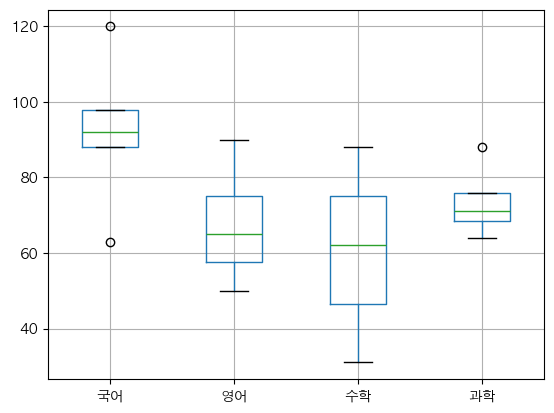

In [19]:
# 극단치
# 다른 값들에 비해서 동떨어져 있는 값
# 극단치도 데이터 명세서의 정상 범위안에 포함되어 있을 수 있기 때문에 무조건 이상치라고
# 판단할 수 없다.
# 극단치가 있다면 극단치가 이상치인지 반드시 확인해야 한다.

# 극단치를 확인하고자 하는 데이터(범위형 데이터)를 추출하여 boxplot을 그려본다.

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
df1[['국어', '영어', '수학', '과학']].boxplot()
plt.show()

### IQR
- interquantile range(사분위 범위)
- IQR = Q3 - Q1
- 극단치 최소 경계 = Q1 - (1.5 * IQR)
- 극단치 최대 경계 = Q3 + (1.5 * IQR)

In [20]:
# Q1(25%) 위치의 값과 Q3(75%위치의 값)
Q1 = df1['국어'].quantile(q=0.25)
Q3 = df1['국어'].quantile(q=0.75)

print(Q1, Q3)

88.0 98.0


In [21]:
# IQR을 구한다.
IQR = Q3 - Q1
IQR

np.float64(10.0)

In [22]:
# 극단치 최소 경계
outliner_min = Q1 - (1.5 * IQR)
# 극단치 최대 경계
outliner_max = Q3 + (1.5 * IQR)

print(outliner_min, outliner_max)

73.0 113.0


In [23]:
# 극단치에 해당하는 행을 가져온다.
a1 = df1.query('국어 < @outliner_min or 국어 > @outliner_max')
a1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


### 이상치 처리
- 결측치 처럼 제거하거나 채워주거나 하는 함수는 없다.
- 이상치라고 판단되는 데이터를 직접 찾아서 처리해줘야 한다.

In [24]:
# 정상 범위에서 벗어나느 데이터를 가져온다.
# 점수의 정상 범위는 0 ~ 100까지라고 가정한다.
df2 = df1.copy()

# 이상치라고 판단되는 값을 가진 행의 index를 추출한다.
idx = df2.query('국어 < 0 or 국어 > 100').index

# idx에 해당하는 행을 모두 제거한다.
df2.drop(idx, inplace=True)

display(df1)
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0


In [25]:
# 대체
df2 = df1.copy()

# 이상치라고 판단되는 값을 가진 행의 index를 추출한다.
idx = df2.query('국어 < 0 or 국어 > 100').index

df2.loc[idx, '국어'] = 100

display(df1)
display(df2)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,100,50.0,NaN,88.0
